El objetivo de este pairprogramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:

1. Normalidad (ya la deberíais haber evaluado) 

2. Homogeneidad de varianzas 

3. Independencia de las variables

Cada asunción la deberéis testar de forma visual y analítica

In [ ]:
#antes de empezar necesitaremos importar: 
#!pip install researchpy
#!pip install scipy

In [5]:
import pandas as pd
import random 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene


plt.rcParams["figure.figsize"] = (10,8) 


In [22]:
df = pd.read_csv("Datos/possum.csv", index_col = 0)
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 1 to 104
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      104 non-null    int64  
 1   Pop       104 non-null    object 
 2   sex       104 non-null    object 
 3   age       102 non-null    float64
 4   hdlngth   104 non-null    float64
 5   skullw    104 non-null    float64
 6   totlngth  104 non-null    float64
 7   taill     104 non-null    float64
 8   footlgth  103 non-null    float64
 9   earconch  104 non-null    float64
 10  eye       104 non-null    float64
 11  chest     104 non-null    float64
 12  belly     104 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 15.4+ KB


1. Normalidad ---- Sí, cumple la asunción de normalidad

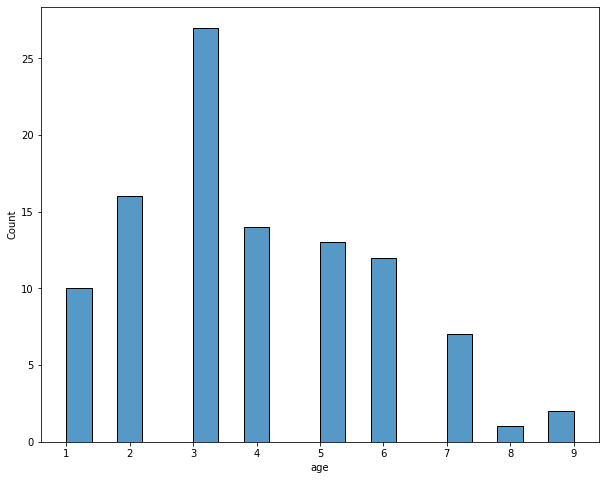

In [8]:
sns.histplot(df["age"],  bins=20);

In [9]:
stats.shapiro(df["age"])

ShapiroResult(statistic=nan, pvalue=1.0)

2. Homogeneidaad de varianzas ------- Si la dispersión de los puntos es constante en todo el intervalo podremos decir que si se cumple la asunción de homogeneidad de varianzas, es el caso de comparar la edad con: localización, cola, torso, abdomen

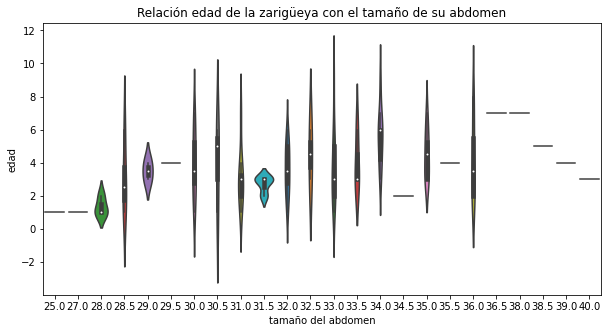

In [10]:
# violin plot

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x       = 'belly',
    y       = 'age',
    data    = df,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Relación edad de la zarigüeya con el tamaño de su abdomen')
ax.set_ylabel('edad')
ax.set_xlabel('tamaño del abdomen');

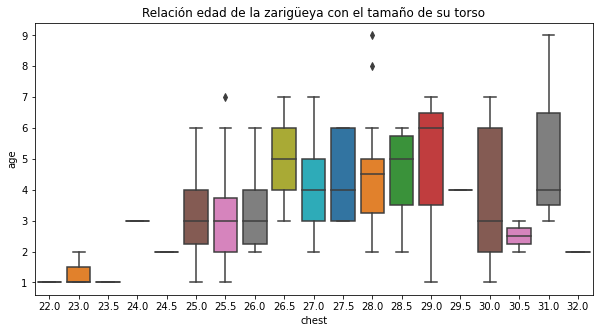

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.boxplot(
    x       = 'chest',
    y       = 'age',
    data    = df,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Relación edad de la zarigüeya con el tamaño de su torso')
ax.set_ylabel('age')
ax.set_xlabel('chest');

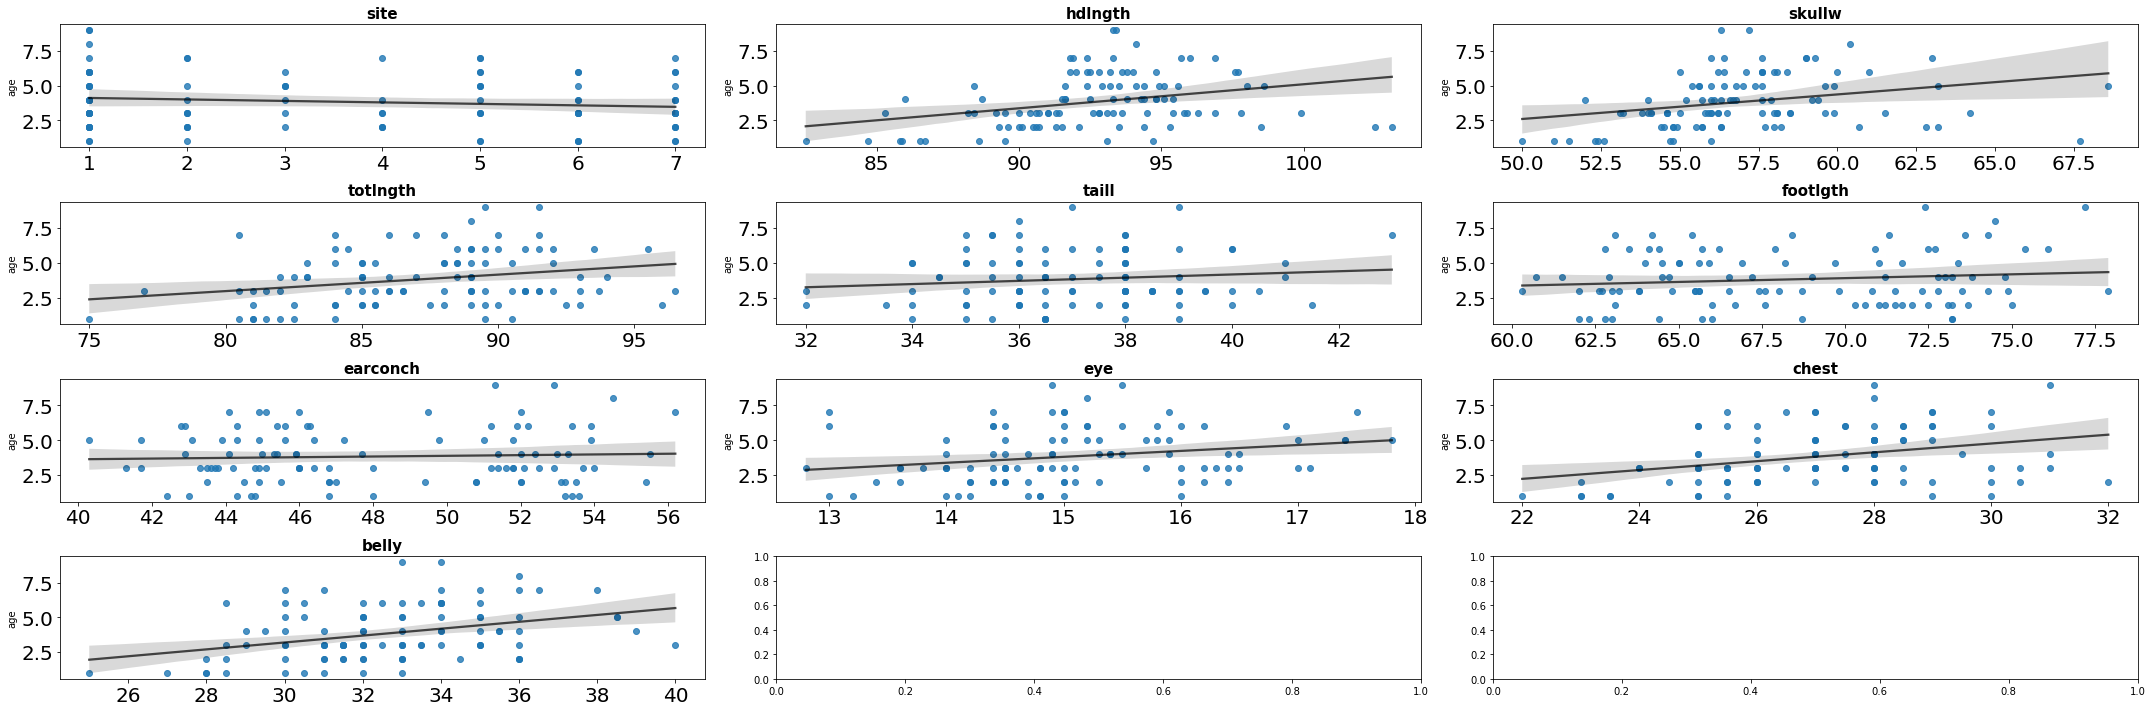

In [14]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (30, 10))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_caracteristicas = ["belly", "chest", "hdlngth"]

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('age', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'age',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

3. Independencia de las variables ---- El valor p es 0.0458, por lo que rechazaremos la hipótesis nula y concluimos que las variables son dependientes entre ellas, no hay independencia.

In [18]:
crosstab, test_results, expected = rp.crosstab(df["sex"], df["Pop"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [19]:
crosstab.head()

Pop               
Pop    Vic  other     All
sex                      
f    23.08  18.27   41.35
m    21.15  37.50   58.65
All  44.23  55.77  100.00

In [23]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,3.9876
1,p-value =,0.0458
2,Cramer's phi =,0.1958
